In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# 1. Veri setini yükleme
df = pd.read_csv('Fraud.csv')

# İlk 5 satırı gösterme
print(df.head())



   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [3]:
# 2. Kategorik verilerin sayısallaştırılması
df['type'] = df['type'].astype('category').cat.codes

# Kişisel verileri çıkarma
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  # Kişisel veriler çıkarılıyor
y = df['isFraud']



In [4]:
# 3. Veri Ön İşleme: Özelliklerin ölçeklenmesi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Veriyi Eğitim ve Test Verisine Ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [5]:
# 5. Rastgele Orman Modelini Eğitme
rf_model = RandomForestClassifier(
    n_estimators=20,       # Daha az ağaç kullanarak hızlandırma
    max_depth=10,          # Derinliği sınırlayarak modelin karmaşıklığını azaltma
    min_samples_split=10,  # Daha az sayıda örnekle bölme
    min_samples_leaf=4,    # Yaprak düğümlerindeki minimum örnek sayısı
    random_state=42, 
    n_jobs=-1              # Çok çekirdekli işlemeyi etkinleştirerek hızlandırma
)

# Modeli eğitme
rf_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=20, n_jobs=-1, random_state=42)

In [6]:
# 6. Model Performansını Değerlendirme

# Test verisiyle tahmin yapma
y_pred = rf_model.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Performans metriklerini yazdırma
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.9996267260971109
Precision: 0.993960310612597
Recall: 0.7111111111111111
F1 Score: 0.8290752069089601
Confusion Matrix:
 [[1270897       7]
 [    468    1152]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.99      0.71      0.83      1620

    accuracy                           1.00   1272524
   macro avg       1.00      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



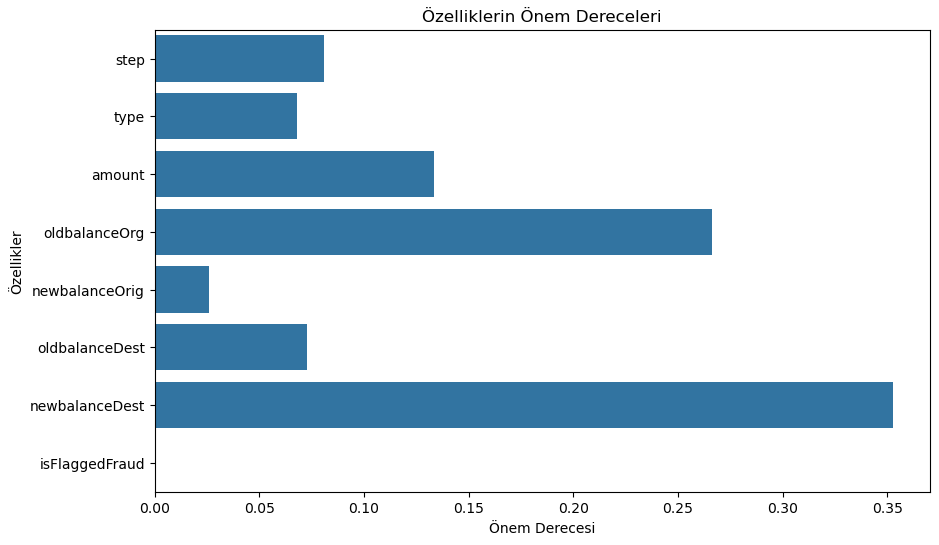

In [7]:
# 7. Özelliklerin Önem Derecelerini Görselleştirme
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features)
plt.title('Özelliklerin Önem Dereceleri')
plt.xlabel('Önem Derecesi')
plt.ylabel('Özellikler')
plt.show()



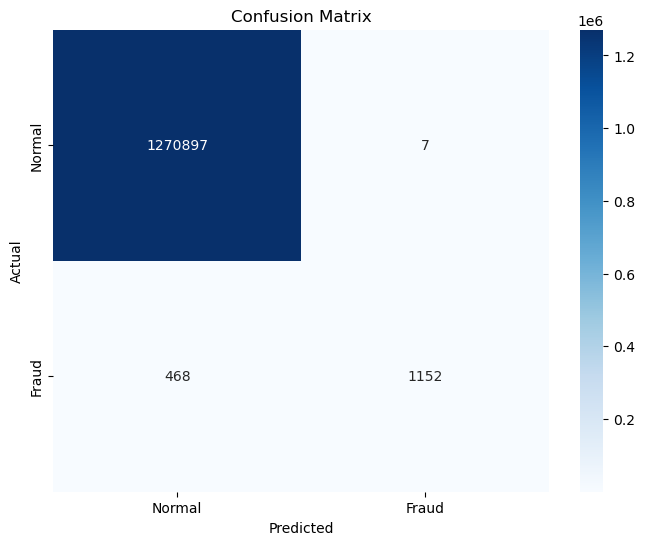

In [8]:
# 8. Karışıklık Matrisi Görselleştirme
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
